<a href="https://colab.research.google.com/github/johannnamr/Discrepancy-based-inference-using-QMC/blob/main/Sample-complexity/Uniform/Unif_conv_slicedW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uniform distribution

Notebook for convergence of the sliced Wasserstein distance

### Mount Drive

In [ ]:
# mount my drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


The following path has to be adjusted if necessary:

In [ ]:
%run "/content/drive/My Drive/Colab Notebooks/ot_slicedW.ipynb"
%run "/content/drive/My Drive/Colab Notebooks/Utils.ipynb"
%run "/content/drive/My Drive/Colab Notebooks/Plot_fcts.ipynb"

     |████████████████████████████████| 440kB 9.2MB/s 
     |████████████████████████████████| 1.5MB 8.5MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 4.0 MB 8.5 MB/s 


Set saving path (adjsut if necessary):

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Paper/Sample Complexity/'

### Imports

In [ ]:
import numpy as np

### Sliced Wasserstein distance convergence

Calculate sliced Wasserstein distance for fixed $d=1$ and varying $n$:

In [ ]:
np.random.seed(111)

Set parameters:

In [ ]:
n = [ 2**j for j in range(3,15) ]       # number of simulated samples - powers of 2
num = 25                                # numbers of repetitions for MC and RQMC
d = 1                                   # dimensions of data
n_projections = 100                     # number of projections
metric = 'euclidean'                    # 'euclidean', 'sqeuclidean',‘minkowski’ or ‘cityblock’
sobol = True                            # 'True': Sobol points, 'False': Halton sequence

Define the QMC sequence:

In [ ]:
if sobol:
  qmc = qmcpy.Sobol(d)
else:
  qmc = qmcpy.Halton(d)

Calculate sliced Wasserstein distance for varying $n$:

In [ ]:
w_mc,w_qmc,w_rqmc,w_min_mc,w_max_mc,w_min_rqmc,w_max_rqmc = slicedW_conv('unif',n,num,d,n_projections,metric,sobol=sobol)

sample size:  8
sample size:  16
sample size:  32
sample size:  64
sample size:  128
sample size:  256
sample size:  512
sample size:  1024
sample size:  2048
sample size:  4096
sample size:  8192
sample size:  16384


Plot the sliced Wasserstein distance against $n$:

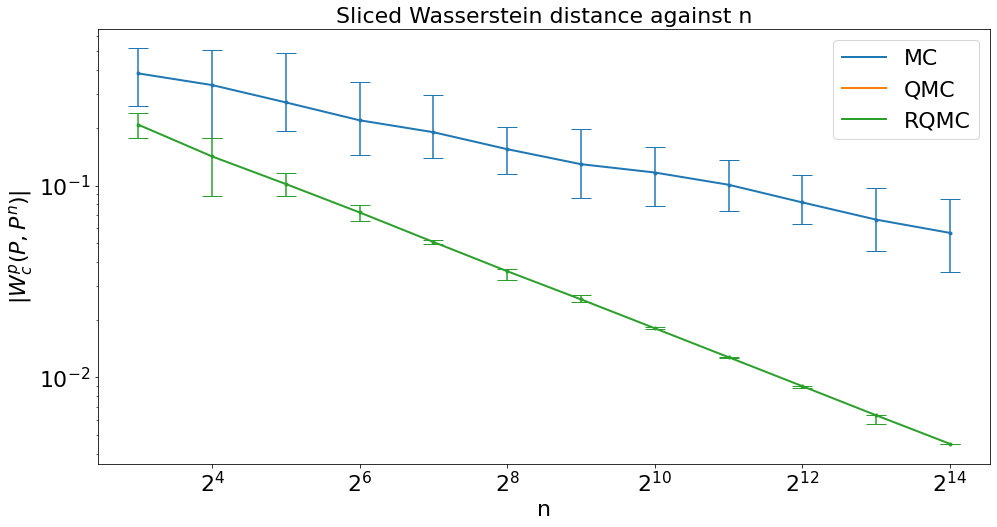

In [ ]:
plot_slicedW_conv(d,(16,8),w_mc,w_qmc,w_rqmc,'MC','QMC','RQMC',w_min_mc,w_max_mc,w_min_rqmc,w_max_rqmc)

In [ ]:
if sobol:
  np.savez(path+"unif_slicedw_n_d=1_nproj=%s_%s_sobol.npz" %(n_projections,metric), w_mc=w_mc,w_min_mc=w_min_mc,w_max_mc=w_max_mc,w_rqmc=w_rqmc,w_min_rqmc=w_min_rqmc,w_max_rqmc=w_max_rqmc,w_qmc=w_qmc)
else:
  np.savez(path+"unif_slicedw_n_d=1_nproj=%s_%s.npz" %(n_projections,metric), w_mc=w_mc,w_min_mc=w_min_mc,w_max_mc=w_max_mc,w_rqmc=w_rqmc,w_min_rqmc=w_min_rqmc,w_max_rqmc=w_max_rqmc,w_qmc=w_qmc)

Calculate sliced Wasserstein distance for fixed $n=m$ and varying $d$:

In [ ]:
np.random.seed(111)

Set parameters:


In [ ]:
n = 2**13                                     # number of samples
num = 25                                      # numbers of repetitions for MC and RQMC
#d = [1,2,3,4,5,6,7,8,9,10,15,20]             # number of dimensions
d = [1,5,10,15,20,25,50,75,100,150,200,300]   # number of dimensions
n_projections = 100                           # number of projections  
metric = 'euclidean'                          # 'euclidean', 'sqeuclidean',‘minkowski’ or ‘cityblock’  
sobol = True                                  # 'True': Sobol points, 'False': Halton sequence                           

Define the QMC sequence:

In [ ]:
if sobol:
  qmc = qmcpy.Sobol(np.max(d))
else:
  qmc = qmcpy.Halton(np.max(d))

Calculate Wasserstein distance for varying $d$:

In [ ]:
w_mc,w_qmc,w_rqmc,w_min_mc,w_max_mc,w_min_rqmc,w_max_rqmc = slicedW_conv_d('unif',n,num,d,n_projections,metric,sobol=sobol)

Number of dimensions:  1
Number of dimensions:  5
Number of dimensions:  10
Number of dimensions:  15
Number of dimensions:  20
Number of dimensions:  25
Number of dimensions:  50
Number of dimensions:  75
Number of dimensions:  100
Number of dimensions:  150
Number of dimensions:  200
Number of dimensions:  300


Plot the sliced Wasserstein distance against $d$:

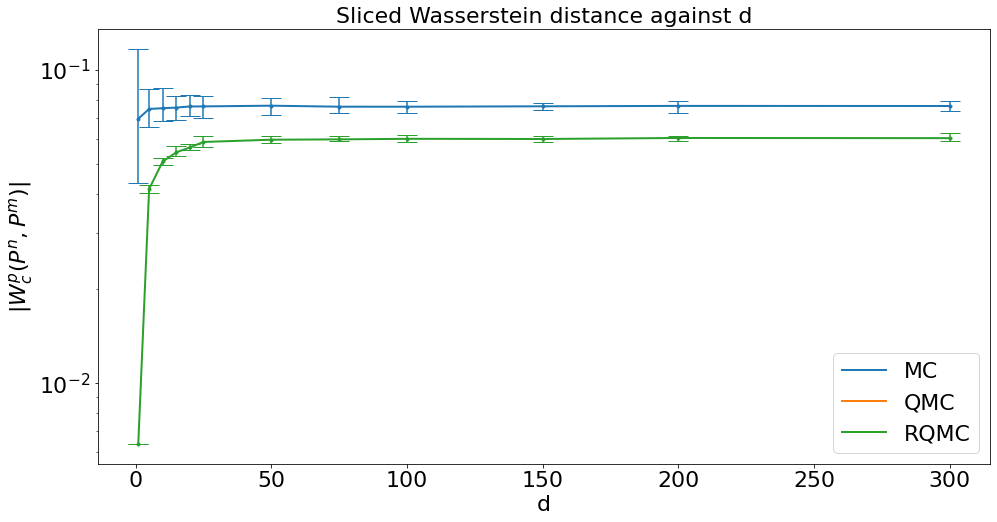

In [ ]:
plot_slicedW_conv_d(d,(16,8),w_mc,w_qmc,w_rqmc,'MC','QMC','RQMC',w_min_mc,w_max_mc,w_min_rqmc,w_max_rqmc)

In [ ]:
if sobol:
  np.savez(path+"unif_slicedw_d_n=8192_nproj=%s_%s_sobol.npz" %(n_projections,metric), w_mc=w_mc,w_min_mc=w_min_mc,w_max_mc=w_max_mc,w_rqmc=w_rqmc,w_min_rqmc=w_min_rqmc,w_max_rqmc=w_max_rqmc,w_qmc=w_qmc)
else:
  np.savez(path+"unif_slicedw_d_n=8192_nproj=%s_%s.npz" %(n_projections,metric), w_mc=w_mc,w_min_mc=w_min_mc,w_max_mc=w_max_mc,w_rqmc=w_rqmc,w_min_rqmc=w_min_rqmc,w_max_rqmc=w_max_rqmc,w_qmc=w_qmc)